# This script 
=> loads preprocessed training data 

=> splits it into training and validation sets 

=> compiles ResUnet model using the Adam optimizer with a binary cross-entropy loss function 

=> trains each model for a specified number of epochs 

=> ModelCheckpoint callbacks are used to save the best-performing models based on validation accuracy during training

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import MeanIoU
from keras.models import load_model
import matplotlib.pyplot as plt

# Load preprocessed data

In [24]:
X_train = np.load(r'path\X_train.npy')
y_train = np.load(r'path\y_train.npy')
X_val = np.load(r'path\X_val.npy')
y_val = np.load(r'path\y_val.npy')
X_test = np.load(r'path\X_test.npy')
y_test = np.load(r'path\y_test.npy')

# Load or define the Resnet model

In [25]:
model = load_model(r'path\S2_Model\resunet.keras')

# Compile the model

In [26]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks

In [27]:
checkpoint = ModelCheckpoint(r'path\resunet_trained_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Train the model

In [28]:
history = model.fit(X_train, y_train, batch_size=16, epochs=20, 
                    validation_data=(X_val, y_val), callbacks=[checkpoint, early_stop])


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5172 - loss: 0.6833
Epoch 1: val_loss improved from inf to 0.69121, saving model to C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S3_training\resunet_trained_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.5120 - loss: 0.6830 - val_accuracy: 0.3651 - val_loss: 0.6912
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4596 - loss: 0.6662
Epoch 2: val_loss improved from 0.69121 to 0.68836, saving model to C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S3_training\resunet_trained_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.4642 - loss: 0.6655 - val_accuracy: 0.4073 - val_loss: 0.6884
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5317 - loss: 0.6478
Epoch 3: val_loss improved from 0.68836 to 0.67618, saving model to C:\Users\20301207\Downloads\Project_CSE439-Machine_Vision-_BRACU-main\S3_training\resunet_trained_model.keras
4

# Get training and validation loss from the history object

In [29]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss

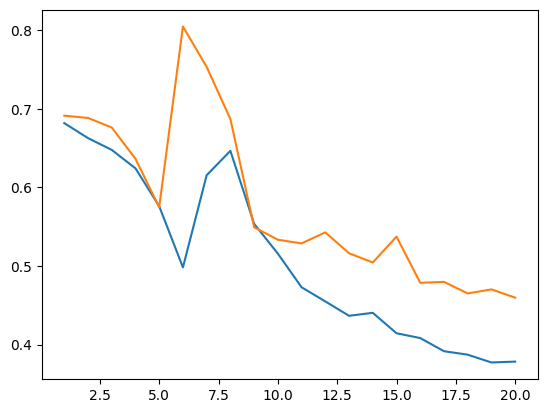

In [30]:
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')